In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# Create Own Decision Tree Gradient Booster

In [3]:
np.random.seed(42)
X = np.random.rand(200, 1) * 1.5
y = np.cos(X[:, 0]*3) + 0.1 * np.random.randn(200)

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=123)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=123)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=123)
tree_reg3.fit(X, y3)

y4 = y3 - tree_reg3.predict(X)
tree_reg4 = DecisionTreeRegressor(max_depth=2, random_state=123)
tree_reg4.fit(X, y4)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

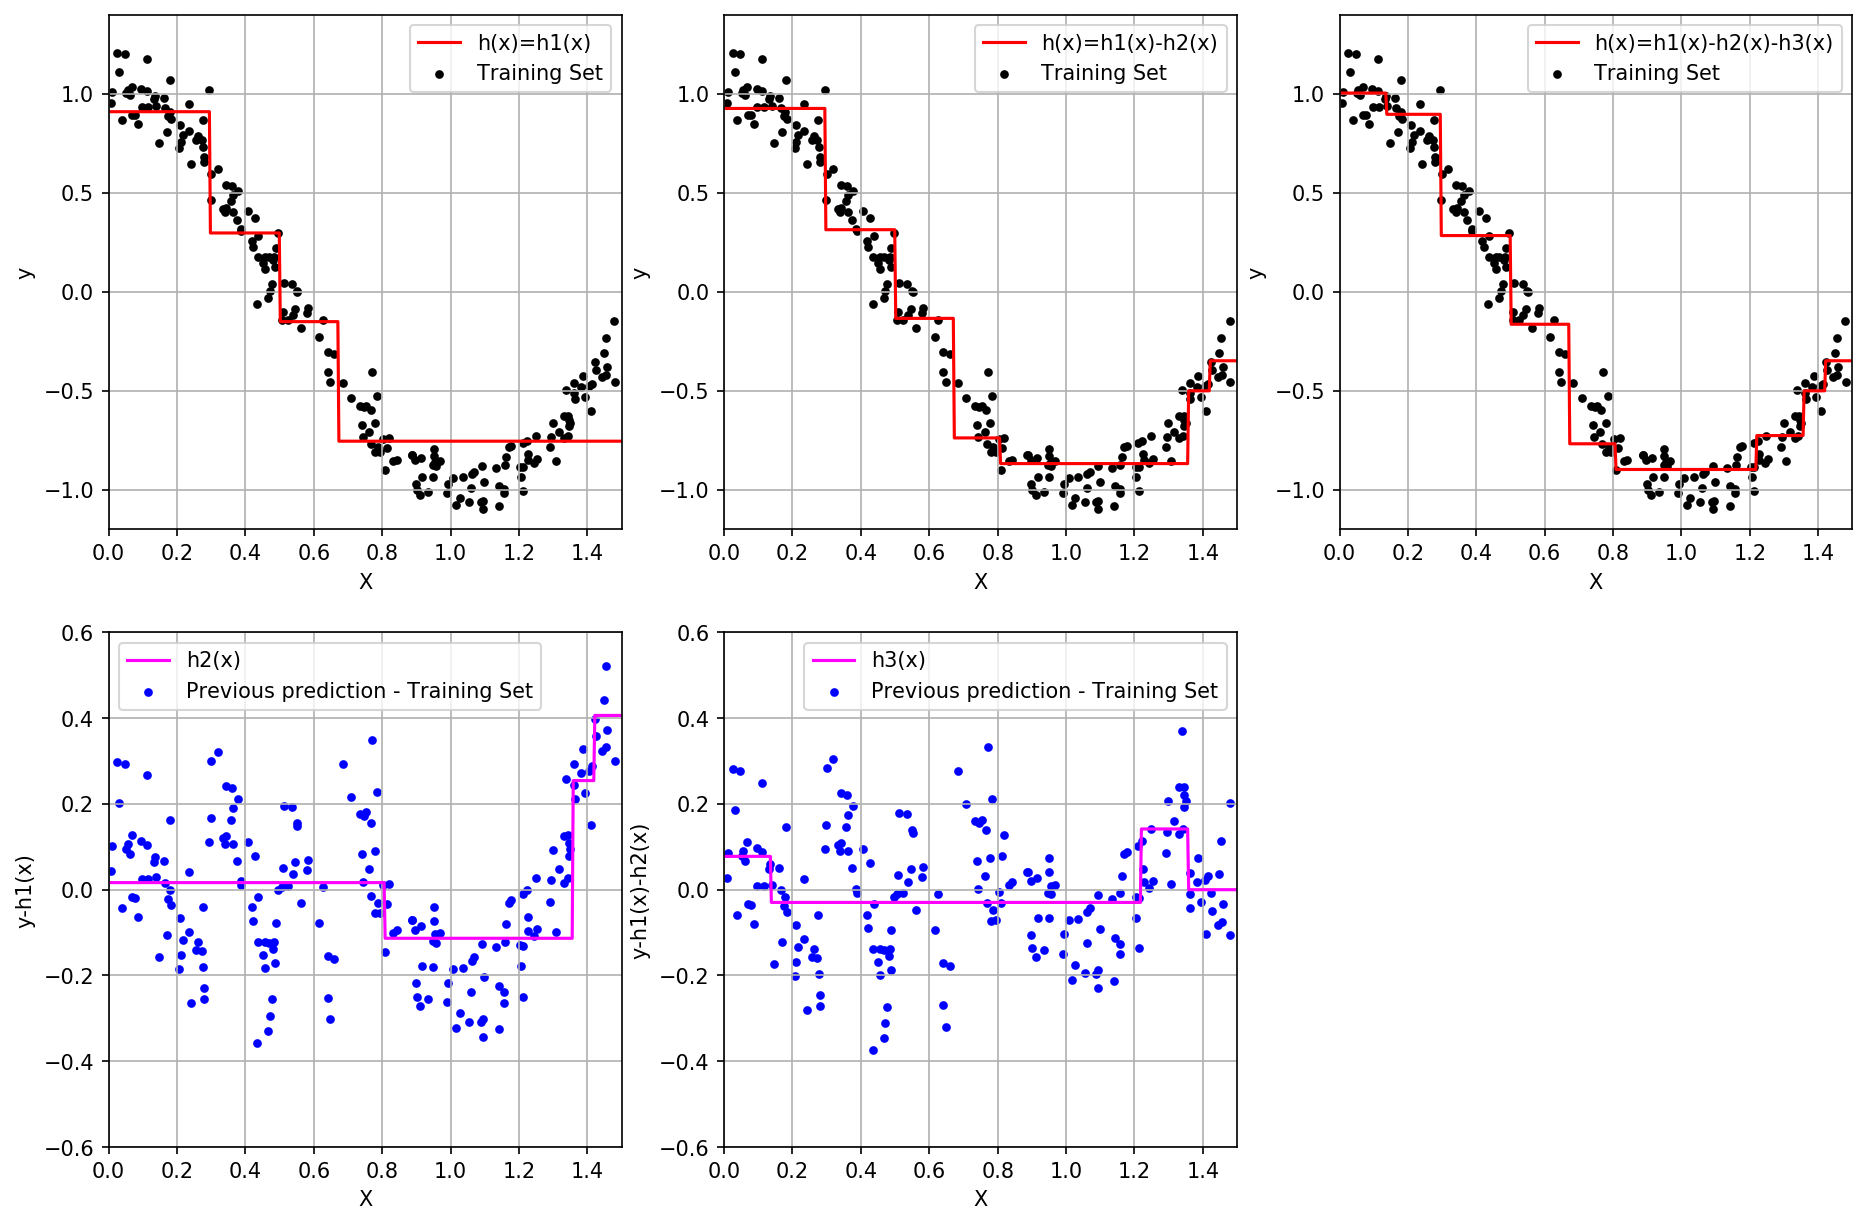

In [5]:
def plotRow1(x, y, x1, y1, limitx, limity, legendDat):
    plt.scatter(X, y, color='black', s=10);
    plt.plot(x1, y1 ,'red')
    plt.xlim(limitx)
    plt.ylim(limity)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend([legendDat,'Training Set'])

def plotRow2(x, y, x1, y1, limitx, limity, ylab, legendDat, lincol, dotcol):
    plt.scatter(X, y, color=dotcol, s=10);
    plt.plot(x1, y1 , lincol)
    plt.xlim(limitx)
    plt.ylim(limity)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel(ylab)
    plt.legend([legendDat,'Previous prediction - Training Set'])

x1 = np.linspace(0, 1.5, 500).reshape(-1,1)
plt.figure(figsize=(15,10))

limitx=[0,1.5]
limity=[-1.2, 1.4]
plt.subplot(231)
plotRow1(X, y, x1, tree_reg1.predict(x1), limitx, limity, 'h(x)=h1(x)')
plt.subplot(232)
plotRow1(X, y, x1, tree_reg1.predict(x1)+tree_reg2.predict(x1), limitx, limity, 'h(x)=h1(x)-h2(x)')
plt.subplot(233)
plotRow1(X, y, x1, tree_reg1.predict(x1)+tree_reg2.predict(x1)+tree_reg3.predict(x1), limitx, limity, 'h(x)=h1(x)-h2(x)-h3(x)')

plt.subplot(234)
plotRow2(X, y2, x1, tree_reg2.predict(x1), [0,1.5], [-0.6,0.6], 'y-h1(x)', 'h2(x)', 'fuchsia', 'blue')
plt.subplot(235)
plotRow2(X, y3, x1, tree_reg3.predict(x1), [0,1.5], [-0.6,0.6], 'y-h1(x)-h2(x)', 'h3(x)', 'fuchsia', 'blue')

# Use SKLearn Gradient Boosted Decision Tree

In [6]:
# API Doc:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

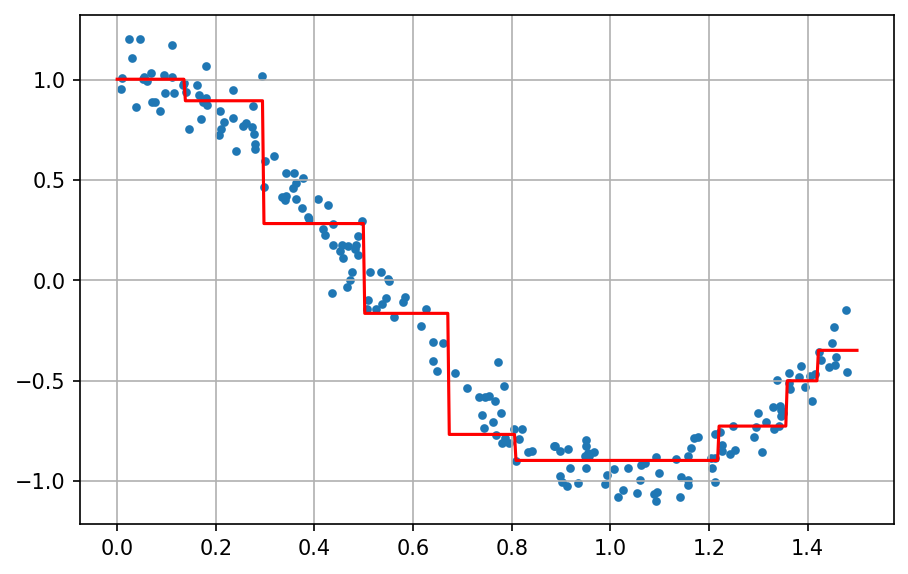

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)
plt.scatter(X, y, s=10);
plt.plot(x1, gbrt.predict(x1),'r')
plt.grid()